# Intro to Data Structures 

From [pandas documentation page](https://pandas.pydata.org/pandas-docs/stable/getting_started/dsintro.html)

In [214]:
import numpy as np
import pandas as pd
import matplotlib as mp
%matplotlib inline

Here is a basic tenet to keep in mind: data alignment is intrinsic. The link between labels and data will not be broken unless done so explicitly by you.

We’ll give a brief intro to the data structures, then consider all of the broad categories of functionality and methods in separate sections.

# Series


**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

```>>> s = pd.Series(data, index=index)```

Here, data can be many different things:

* a Python dict
* an ndarray
* a scalar value (like 5)

The passed __index__ is a list of axis labels. Thus, this separates into a few cases depending on what __data is__:



## **From ndarray**

If data is an ndarray, __index__ must be the same length as __data__. If no index is passed, one will be created having values [0, ..., len(data) - 1].



In [3]:
s= pd.Series(np.random.randn(5), index=['a','b','c','d','e'])
s

a    1.398952
b   -1.991198
c   -0.354688
d   -0.615852
e   -1.255421
dtype: float64

In [4]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [5]:
pd.Series(np.random.randn(5))

0    1.457872
1   -0.587975
2   -1.484207
3    0.675172
4    0.595393
dtype: float64

In [6]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

__Note__: pandas supports non-unique index values. If an operation that does not support duplicate index values is attempted, an exception will be raised at that time. The reason for being lazy is nearly all performance-based (there are many instances in computations, like parts of GroupBy, where the index is not used).


In [7]:
s= pd.Series(np.random.randn(5), index=['a', 'b', 'b', 'c', 'd'])

In [8]:
s

a   -0.079096
b    0.674088
b   -0.048965
c    0.626069
d   -0.468995
dtype: float64

In [14]:
s1= pd.Series(np.random.randn(5), index= list(range(0, 5)))

In [15]:
s1

0   -0.078892
1    0.199243
2   -1.147857
3    0.158668
4    1.105875
dtype: float64

In [6]:
print(list(np.random.randn(5)))
list(range(0,5))

[-0.016133291134408485, 0.5709034313604505, 1.9176768503864872, -0.38578745689416094, 0.1503162417787328]


[0, 1, 2, 3, 4]

In [11]:
n1= list(range(1,6))
n1
n2= list(range(10, 35, 5))

n1+n2
#n1.append(n2)
list_of_list=[n1, n2]
list_of_list


[[1, 2, 3, 4, 5], [10, 15, 20, 25, 30]]

## **From dict**

Series can be instaniated from dicts:

In [13]:
d={'b':1, 'a':0, 'c':2}
d

{'b': 1, 'a': 0, 'c': 2}

In [14]:
type(d)

dict

In [11]:
pd.Series(d)

b    1
a    0
c    2
dtype: int64

__Note__: When the data is a dict, and an index is not passed, the Series index will be ordered by the dict’s insertion order, if you’re using Python version >= 3.6 and Pandas version >= 0.23.
If you’re using Python < 3.6 or Pandas < 0.23, and an index is not passed, the Series index will be the lexically ordered list of dict keys.

In the example above, if you were on a Python version lower than 3.6 or a Pandas version lower than 0.23, the Series would be ordered by the lexical order of the dict keys (i.e. ['a', 'b', 'c'] rather than ['b', 'a', 'c']).

If an index is passed, the values in data corresponding to the labels in the index will be pulled out.

In [12]:
d= {'a':0., 'b':1., 'c': 2. }

In [13]:
pd.Series(d)

a    0.0
b    1.0
c    2.0
dtype: float64

In [14]:
pd.Series(d, index=['b', 'c', 'd', 'a'])

b    1.0
c    2.0
d    NaN
a    0.0
dtype: float64

__Note__: NaN (not a number) is the standard missing data marker used in pandas.

In [18]:
pd.Series(d, index=['a', 'b'])

a    0
b    1
dtype: int64

In [20]:
d= {'a':0., 'b':1, 'c':4, 'e':10}
print(pd.Series(d, index=['a', 'd', 'c', 'e']))
pd.Series(d, index=['a', 'd', 'e'])

a     0.0
d     NaN
c     4.0
e    10.0
dtype: float64


a     0.0
d     NaN
e    10.0
dtype: float64

#### **From scalar value**

If data is a scalar value, an index must be provided. The value will be repeated to match the length of index.

In [16]:
pd.Series(5., index=['a', 'b', 'c', 'd', 'e'])

a    5.0
b    5.0
c    5.0
d    5.0
e    5.0
dtype: float64

In [17]:
pd.Series(4., index=[2, 4, 6, 8])

2    4.0
4    4.0
6    4.0
8    4.0
dtype: float64

# Series is ndarray-like

*Series* acts very similarly to a ndarray, and is a valid argument to most NumPy functions. However, operations such as slicing will also slice the index.



In [28]:
np.random.seed(44)
s= pd.Series(np.random.randn(5))
s

0   -0.750615
1    1.316357
2    1.246140
3   -1.604916
4   -1.468144
dtype: float64

In [29]:
s[0]

-0.7506147172558728

In [30]:
s[:3]

0   -0.750615
1    1.316357
2    1.246140
dtype: float64

In [31]:
s[s> s.median()]

1    1.316357
2    1.246140
dtype: float64

In [32]:
s[[4, 3, 1]]

4   -1.468144
3   -1.604916
1    1.316357
dtype: float64

In [23]:
np.exp(s)

0    0.453189
1    1.357799
2    0.713756
3    0.469309
4    0.811625
dtype: float64

__Note__: We will address array-based indexing like s[[4, 3, 1]] in [section](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing).

Like a NumPy array, a pandas Series has a dtype.

In [33]:
s.dtype

dtype('float64')

This is often a NumPy dtype. However, pandas and 3rd-party libraries extend NumPy’s type system in a few places, in which case the dtype would be a ExtensionDtype. Some examples within pandas are Categorical Data and Nullable Integer Data Type. See dtypes for more.

If you need the actual array backing a Series, use Series.array.

In [38]:
s

0   -0.750615
1    1.316357
2    1.246140
3   -1.604916
4   -1.468144
dtype: float64

In [34]:
s.array

<PandasArray>
[-0.7506147172558728,  1.3163573247118194,  1.2461400286434303,
 -1.6049157412585944,  -1.468143678979905]
Length: 5, dtype: float64

Accessing the array can be useful when  you need to do some operation without the index (to disable automatic alignment, for example)

In [40]:
#Use  instead numpy.array(s)
np.array(s)

array([-0.75061472,  1.31635732,  1.24614003, -1.60491574, -1.46814368])


Series.array will always be an ExtensionArray. Briefly, an ExtensionArray is a thin wrapper around one or more concrete arrays like a numpy.ndarray. Pandas knows how to take an ExtensionArray and store it in a Series or a column of a DataFrame. See dtypes for more.

__Note__:While Series is ndarray-like, if you need an actual ndarray, then use Series.to_numpy().

In [42]:
s.to_numpy()

array([-0.75061472,  1.31635732,  1.24614003, -1.60491574, -1.46814368])

In [44]:
s.tolist()
s

0   -0.750615
1    1.316357
2    1.246140
3   -1.604916
4   -1.468144
dtype: float64

### Data alignment and arithmetic

Data alignment between DataFrame objects automatically align on **both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.

In [47]:
3 + 2.5 * np.random.randn(3, 4)

array([[3.2258238 , 1.79935797, 3.75165684, 5.78244957],
       [2.95171238, 2.997981  , 1.40367442, 6.98670841],
       [3.04653247, 4.40352168, 2.50380795, 4.15801888]])

In [48]:
df= pd.DataFrame(np.random.randn(10,4), columns=['A','B','C', 'D'])
df

,A,B,C,D
0,-1.819094,0.132925,-0.617080,1.308180
1,0.775838,-0.280170,-0.723938,-0.943310
2,0.561686,-0.692793,1.701760,-1.051723
3,-0.661152,-1.010900,-1.458881,0.390553
4,-0.810444,1.157672,0.031763,-1.896928
5,-0.864951,-0.057197,1.231018,-0.533551
6,-0.335974,-1.555724,1.218639,-2.257643
7,0.221018,-0.055172,0.281184,0.598646
8,1.027174,0.006942,-1.753310,1.549230
9,-0.645377,0.879338,-0.318382,0.727358


In [51]:
df.iloc[0:3]

,A,B,C,D
0,-1.819094,0.132925,-0.617080,1.308180
1,0.775838,-0.280170,-0.723938,-0.943310
2,0.561686,-0.692793,1.701760,-1.051723


In [30]:
df.iloc[0:3, 0:2]

,A,B
0,0.799158,0.729943
1,-0.736483,0.398174
2,-0.574469,-0.265632


In [31]:
df2= pd.DataFrame(np.random.randn(7,3), columns=['A', 'B', 'C'])
df2

,A,B,C
0,-0.626957,2.158551,0.620508
1,-1.379415,1.264372,0.630476
2,1.458662,-0.844434,0.292324
3,-0.019388,-0.030245,1.200366
4,-0.773317,-0.363007,0.931659
5,1.198867,0.801625,1.273848
6,0.108116,-0.556501,-1.154257


In [32]:
df + df2

,A,B,C,D
0,0.172202,2.888493,0.104825,NaN
1,-2.115898,1.662546,1.793907,NaN
2,0.884192,-1.110066,-0.933821,NaN
3,0.854185,-0.581986,-0.277184,NaN
4,-2.146468,-0.711804,2.265409,NaN
5,0.930464,0.573841,1.011167,NaN
6,-0.432822,-2.883981,-0.341107,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


When doing an operation between DataFrame and Series, the default behavior is to align the Series **index** on the DataFrame **columns**, thus broadcasting row-wise. For example:

In [33]:
df-df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-1.535641,-0.331769,1.679113,0.218017
2,-1.373628,-0.995575,-0.710463,-2.859282
3,0.074415,-1.281683,-0.961868,-2.455390
4,-2.172310,-1.078740,1.849432,1.552739
5,-1.067562,-0.957727,0.253000,-1.079870
6,-1.340097,-3.057423,1.328832,-1.685801
7,-1.478122,-1.989226,1.707298,-2.561329
8,-1.633649,-1.716579,0.787936,-0.093205
9,-0.444826,-0.732382,2.277855,-1.038066


In [34]:
df

,A,B,C,D
0,0.799158,0.729943,-0.515682,1.130279
1,-0.736483,0.398174,1.163431,1.348296
2,-0.574469,-0.265632,-1.226145,-1.729003
3,0.873573,-0.551740,-1.477550,-1.325111
4,-1.373151,-0.348797,1.333749,2.683018
5,-0.268404,-0.227784,-0.262682,0.050409
6,-0.540939,-2.327480,0.813149,-0.555522
7,-0.678963,-1.259283,1.191616,-1.431050
8,-0.834491,-0.986637,0.272254,1.037074
9,0.354332,-0.002439,1.762173,0.092213


In [55]:
df.iloc[0]

A   -1.819094
B    0.132925
C   -0.617080
D    1.308180
Name: 0, dtype: float64

In [36]:
df.iloc[0:4, 0:2]

,A,B
0,0.799158,0.729943
1,-0.736483,0.398174
2,-0.574469,-0.265632
3,0.873573,-0.551740


# Series is dict-like

A Series is like a fixed-size dict in that you can get and set values by index label:

In [56]:
s= pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a   -0.065582
b   -0.451052
c    0.853530
d   -2.535682
e   -0.387484
dtype: float64

In [38]:
pd.DataFrame([s]) #  Use index as column labels

,a,b,c,d,e
0,-0.497063,-0.425666,-0.988363,-1.835242,-0.28547


In [42]:
pd.DataFrame(s) # Use index as row labels

,0
a,-0.497063
b,-0.425666
c,-0.988363
d,-1.835242
e,12.000000


In [43]:
s['a']

-0.4970628097160196

In [64]:
s['e'] = 12
s

a    -0.065582
b    -0.451052
c     0.853530
d    -2.535682
e    12.000000
dtype: float64

In [65]:
'e' in s

True

In [66]:
'f' in s

False

If a label is not contained, an exception is raised:

In [67]:
#s['f']

Using the get method, a missing label will return None or specified default:

In [68]:
s.get('f', 'NA')

'NA'

In [69]:
s.get('', np.nan)

nan

In [73]:
s.get(2, np.nan)

0.8535303082962497

See also the section on attribute access.

# Vectorized operations and label alignment with Series

When working with raw NumPy arrays, looping through value-by-value is usually not necessary. The same is true when working with Series in pandas. Series can also be passed into most NumPy methods expecting an ndarray.

In [52]:
s +s

a    -0.994126
b    -0.851332
c    -1.976726
d    -3.670484
e    24.000000
dtype: float64

In [53]:
s*2

a    -0.994126
b    -0.851332
c    -1.976726
d    -3.670484
e    24.000000
dtype: float64

In [54]:
np.exp(s)

a         0.608315
b         0.653334
c         0.372185
d         0.159575
e    162754.791419
dtype: float64

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [75]:
s

a    -0.065582
b    -0.451052
c     0.853530
d    -2.535682
e    12.000000
dtype: float64

In [76]:
s[1:]

b    -0.451052
c     0.853530
d    -2.535682
e    12.000000
dtype: float64

In [77]:
s[:-1]

a   -0.065582
b   -0.451052
c    0.853530
d   -2.535682
dtype: float64

In [57]:
s[1: ] + s[:-1]

a         NaN
b   -0.851332
c   -1.976726
d   -3.670484
e         NaN
dtype: float64

In [58]:
s

a    -0.497063
b    -0.425666
c    -0.988363
d    -1.835242
e    12.000000
dtype: float64

The result of an operation between unaligned Series will have the union of the indexes involved. If a label is not found in one Series or the other, the result will be marked as missing NaN. Being able to write code without doing any explicit data alignment grants immense freedom and flexibility in interactive data analysis and research. The integrated data alignment features of the pandas data structures set pandas apart from the majority of related tools for working with labeled data.

__Note__ In general, we chose to make the default result of operations between differently indexed objects yield the __union__ of the indexes in order to avoid loss of information. Having an index label, though the data is missing, is typically important information as part of a computation. You of course have the option of dropping labels with missing data via the __dropna__ function.

In [80]:
pd.Series(np.random.randn(5), name='name_index_test', index= ['a', 'b', 'c', 'd', 'a'])

a    1.128129
b   -1.084709
c   -1.851127
d    1.333138
a    2.240914
Name: name_index_test, dtype: float64

# Name attribute

Series can also have a name attribute:

In [86]:
s= pd.Series(np.random.randn(5), name='something'); s

0   -0.783068
1    0.243544
2   -1.010053
3   -0.717658
4    2.900848
Name: something, dtype: float64

In [87]:
s.name

'something'

The Series name will be assigned automatically in many cases, in particular when taking 1D slices of DataFrame as you will see below.

New in version 0.18.0.

You can rename a Series with the [pandas.Series.rename()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.rename.html#pandas.Series.rename) method.

In [88]:
s2= s.rename('different'); s2.name

'different'

In [89]:
s2, s

(0   -0.783068
 1    0.243544
 2   -1.010053
 3   -0.717658
 4    2.900848
 Name: different, dtype: float64, 0   -0.783068
 1    0.243544
 2   -1.010053
 3   -0.717658
 4    2.900848
 Name: something, dtype: float64)

Note that s and s2 refer to different objects.


# DataFrame

__DataFrame__ is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

Dict of 1D ndarrays, lists, dicts, or Series:
* 2-D numpy.ndarray
* Structured or record ndarray
* A Series
* Another DataFrame
Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

If axis labels are not passed, they will be constructed from the input data based on common sense rules.

__Note__ When the data is a dict, and columns is not specified, the DataFrame columns will be ordered by the dict’s insertion order, if you are using Python version >= 3.6 and Pandas >= 0.23.
If you are using Python < 3.6 or Pandas < 0.23, and columns is not specified, the DataFrame columns will be the lexically ordered list of dict keys.

# From dict of Series or dicts

The resulting index will be the union of the indexes of the various Series. If there are any nested dicts, these will first be converted to Series. If no columns are passed, the columns will be the ordered list of **dict keys**.

In [100]:
d= {'one': pd.Series( [1., 2., 3.], index= ['a', 'b', 'c']),
    'two': pd.Series( [1., 2., 3., 4.], index= ['a', 'b', 'c', 'd']),
    'three': pd.Series( [2., 4., 6.], index= ['a', 'b', 'c'])}

In [101]:
d

{'one': a    1.0
 b    2.0
 c    3.0
 dtype: float64, 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64, 'three': a    2.0
 b    4.0
 c    6.0
 dtype: float64}

In [113]:
print(d.get('one'))
print(d.get('two'))
print(d.get('four'))
d.get('five', np.nan)

a    1.0
b    2.0
c    3.0
dtype: float64
a    1.0
b    2.0
c    3.0
d    4.0
dtype: float64
None


nan

In [114]:
d.get(1, 'NA')

'NA'

In [115]:
# columns are ordered list of the dict keys
df= pd.DataFrame(d); df

,one,two,three
a,1.0,1.0,2.0
b,2.0,2.0,4.0
c,3.0,3.0,6.0
d,NaN,4.0,NaN


In [116]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two,three
d,NaN,4.0,NaN
b,2.0,2.0,4.0
a,1.0,1.0,2.0


In [117]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,4.0
a,1.0,2.0


The row and column labels can be accessed respectively by accessing the index and columns attributes

__Note__ When a particular set of columns is passed along with a dict of data, the passed columns override the keys in the dict.

In [118]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [119]:
df.columns

Index(['one', 'two', 'three'], dtype='object')

# From dict of ndarrays / lists

The ndarrays must all be the same length. If an index is passed, it must clearly also be the same length as the arrays. If no index is passed, the result will be range(n), where n is the array length.

In [124]:
list(range(5))

[0, 1, 2, 3, 4]

In [130]:
d= {'one': [1., 2., 3., 4.],
    'two': [4., 3., 2., 1.]}
print(type(d))
print(len(d))
print(type(d['one']))
print(len(d['one']))
print()
d


<class 'dict'>
2
<class 'list'>
4



{'one': [1.0, 2.0, 3.0, 4.0], 'two': [4.0, 3.0, 2.0, 1.0]}

In [131]:
pd.DataFrame([d])
#pd.DataFrame(d, index=['a', 'b', 'c', 'd', 'e']) # Gives erroy coz more index than required

,one,two
0,"[1.0, 2.0, 3.0, 4.0]","[4.0, 3.0, 2.0, 1.0]"


In [132]:
pd.DataFrame(d, index=['a', 'b', 'c', 'd'])


,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


# From structured or record array

This case is handled identically to a dict of array

In [133]:
data= np.zeros( (2,), dtype=[ ('A', 'i4'), ('B', 'f4'), ('C', 'a10')] )
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [134]:
print(data.shape)
print(type(data))

(2,)
<class 'numpy.ndarray'>


In [136]:
data[:]= [(1,2., 'Hello'), (2, 3., 'World')]
#data.ndim
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [137]:
pd.DataFrame(data)

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [138]:
pd.DataFrame([data])

,0,1
0,"[1, 2.0, b'Hello']","[2, 3.0, b'World']"


In [139]:
pd.DataFrame(data, index=['first', 'second'])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [140]:
pd.DataFrame(data, columns =['C', 'A', 'B'])

,C,A,B
0,b'Hello',1,2.0
1,b'World',2,3.0


__Note__ DataFrame is not intended to work exactly like a 2-dimensional NumPy ndarray.

# From a list of dicts

In [141]:
# list of dicts
data2= [ {'a': 1, 'b': 2}, {'a':5, 'b':10, 'c':20} ]
print(len(data2))
len(data2[1])

2


3

In [146]:
n1=pd.DataFrame(data2); n1

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [147]:
n1.transpose()

,0,1
a,1.0,5.0
b,2.0,10.0
c,NaN,20.0


In [162]:
pd.DataFrame(data2,  index=['first', 'second'])

,a,b,c
first,1,2,NaN
second,5,10,20.0


In [66]:
pd.DataFrame(data2, columns=['a', 'b'])

,a,b
0,1,2
1,5,10


In [148]:
pd.DataFrame(data2, columns=['a', 'c'])

,a,c
0,1,NaN
1,5,20.0


# From a dict of tuples

You can automatically create a *MultiIndexed* frame by passing a tuples dictionary.

In [149]:
pd.DataFrame( { ('a', 'b'): {('A', 'B'): 1, ('A', 'C'):2},
                ('a', 'a'): {('A', 'C'): 5, ('A', 'B'):4},
                ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
                ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
                ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}})

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  5.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

# From a Series

The result will be a DataFrame with the same index as the input Series, and with one column whose name is the original name of the Series (only if no other column name provided).

## Missing data

Much more will be said on this topic in the Missing data section. To construct a DataFrame with missing data, we use _**np.nan**_ to represent missing values. Alternatively, you may pass a _**numpy.MaskedArray**_ as the data argument to the DataFrame constructor, and its masked entries will be considered missing.

In [150]:
s= pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'])
s

a    0.385936
b    0.039820
c    0.107511
d   -1.284536
e    0.341980
dtype: float64

In [151]:
pd.DataFrame(s, columns=['A']) # Use indexs as row labels

,A
a,0.385936
b,0.039820
c,0.107511
d,-1.284536
e,0.341980


In [152]:
pd.DataFrame([s], index=['A']) # Use index as column labels

,a,b,c,d,e
A,0.385936,0.03982,0.107511,-1.284536,0.34198


# Alternate Constructors

#### DataFram.from_dict

*DataFrame.from_dict* takes a ***dict of dicts*** or a ***dict of array-like sequences*** and returns a DataFrame. It operates like the DataFrame constructor except for the _**orient**_ parameter which is *'columns'* by default, but which can be set to *'index'* in order to use the dict keys as row labels.


In [156]:
# create dictionary from a list of turples
dict1=dict([ ('A', [1,2,3]), ('B', [4, 5, 6])])
dict1

{'A': [1, 2, 3], 'B': [4, 5, 6]}

In [157]:
# 'orient' parameter sets the keys to columns by default
pd.DataFrame.from_dict(dict( [ ('A', [1,2,3]), ('B', [4, 5, 6])])) 

,A,B
0,1,4
1,2,5
2,3,6


In [155]:
# Setting 'orient' to index uses the dict keys as 'row labels'
pd.DataFrame.from_dict(dict1, orient='index') 

,0,1,2
A,1,2,3
B,4,5,6


If you pass _**orient='index'**_, the keys will be the row labels. In this case, you can also pass the desired column names:

In [158]:
pd.DataFrame.from_dict(dict( [ ('A', [1,2,3]), ('B', [4,5,6])]),
                      orient='index', columns=['one', 'two', 'three'])

,one,two,three
A,1,2,3
B,4,5,6


In [159]:
# dict consisting of a list of turples
dict2= dict([ ('Aza', [1, 2, 3]), ('Nda', [4, 5, 6]), ('Muh', [7, 8, 9]) ])
dict2


{'Aza': [1, 2, 3], 'Nda': [4, 5, 6], 'Muh': [7, 8, 9]}

In [163]:
n=(1, 2, 3)
print(len(n))
n1=[ ('Aza', [1, 2, 3]), ('Nda', [4, 5, 6]), ('Muh', [7, 8, 9]) ]
print(type(n1))
print(type(n1[0]))
dict([n1[0]])

3
<class 'list'>
<class 'tuple'>


{'Aza': [1, 2, 3]}

In [181]:
pd.DataFrame.from_dict(dict2)

,Aza,Nda,Muh
0,1,4,7
1,2,5,8
2,3,6,9


In [182]:
# 'orient' sets dict keys to index
pd.DataFrame.from_dict(dict2, orient='index', columns=['pos1', 'pos2', 'pos3'])

,pos1,pos2,pos3
Aza,1,2,3
Nda,4,5,6
Muh,7,8,9


#### DataFrame.from_records

*DataFrame.from_records* takes a list of **tuples** or an **ndarray** with structured dtype. It works analogously to the normal *DataFrame* constructor, except that the resulting DataFrame index may be a specific field of the structured dtype. For example:

In [192]:
data= np.zeros( (2,), dtype=[ ('A', 'i4'), ('B', 'f4'), ('C', 'a10')] )
data[:]= [(1,2., 'Hello'), (2, 3., 'World')]
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [195]:
pd.DataFrame.from_records(data, index='C')

,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


# Column selection, addition, deletion

You can treat a DataFrame semantically like a dict of like-indexed Series objects. Getting, setting, and deleting columns works with the same syntax as the analogous dict operations:

In [179]:
#del df['flag']
df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [180]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [181]:
df['three']= df['one'] * df['two']; df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [182]:
df['flag']= df['one'] > 2 ; df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


Columns can be deleted or popped like with a dict

In [183]:
del df['two']

In [184]:
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False


In [185]:
three= df.pop('three'); df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [186]:
three

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

When inserting a scalar value, it will naturally be propagated to fill the column:

In [187]:
df['foo']= 'bar' ; df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [188]:
df['five']= np.nan; df

,one,flag,foo,five
a,1.0,False,bar,NaN
b,2.0,False,bar,NaN
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [190]:
# Get first 3 rows of column 'one'
df['one'][:3]

a    1.0
b    2.0
c    3.0
Name: one, dtype: float64

When inserting a Series that does not have the same index as the DataFrame, it will be conformed to the DataFrame’s index:

In [216]:
df['one_trunc'] = df['one'][:2]; df

,one,flag,foo,five,one_trunc
a,1.0,False,bar,NaN,1.0
b,2.0,False,bar,NaN,2.0
c,3.0,True,bar,NaN,NaN
d,NaN,False,bar,NaN,NaN


You can insert raw ndarrays but their length must match the length of the DataFrame’s index.

By default, columns get inserted at the end. The insert function is available to insert at a particular location in the columns:

In [217]:
df.insert(1, 'bar', df['one'])

In [218]:
df

,one,bar,flag,foo,five,one_trunc
a,1.0,1.0,False,bar,NaN,1.0
b,2.0,2.0,False,bar,NaN,2.0
c,3.0,3.0,True,bar,NaN,NaN
d,NaN,NaN,False,bar,NaN,NaN


In [ ]:
df.insert(1, 'two', [2, 4, 6, 8])

In [222]:
df

,one,two,bar,flag,foo,five,one_trunc
a,1.0,2,1.0,False,bar,NaN,1.0
b,2.0,4,2.0,False,bar,NaN,2.0
c,3.0,6,3.0,True,bar,NaN,NaN
d,NaN,8,NaN,False,bar,NaN,NaN


# Assigning New Columns in Method Chains

Inspired by [dplyr’s](https://dplyr.tidyverse.org/reference/mutate.html) mutate verb, DataFrame has an [assign()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html#pandas.DataFrame.assign) method that allows you to easily create new columns that are potentially derived from existing columns.

In [194]:
#pip install sklearn

In [196]:
from sklearn import datasets

In [201]:
dat = datasets.load_iris()
type(dat)


sklearn.utils.Bunch

In [198]:
iris = pd.DataFrame(dat.data, columns=dat.feature_names)
print(iris.shape)
iris.head()

(150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [202]:
iris.columns= ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
iris.head(3)

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [203]:
iris.assign(SepalRatio=iris['SepalWidth'] / iris['SepalLength']). head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,SepalRatio
0,5.1,3.5,1.4,0.2,0.686275
1,4.9,3.0,1.4,0.2,0.612245
2,4.7,3.2,1.3,0.2,0.680851
3,4.6,3.1,1.5,0.2,0.673913
4,5.0,3.6,1.4,0.2,0.720000


In the example above, we inserted a precomputed value. 

We can also pass in a function of one argument to be evaluated on the DataFrame being assigned to.

In [204]:
iris.assign(sepal_ratio=lambda x: (x['SepalWidth'] / x['SepalLength'])).head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,sepal_ratio
0,5.1,3.5,1.4,0.2,0.686275
1,4.9,3.0,1.4,0.2,0.612245
2,4.7,3.2,1.3,0.2,0.680851
3,4.6,3.1,1.5,0.2,0.673913
4,5.0,3.6,1.4,0.2,0.720000


*assign* __always__ returns a copy of the data, leaving the original DataFrame untouched.

Passing a callable, as opposed to an actual value to be inserted, is useful when you don’t have a reference to the DataFrame at hand. This is common when using assign in a chain of operations. For example, we can limit the DataFrame to just those observations with a Sepal Length greater than 5, calculate the ratio, and plot:

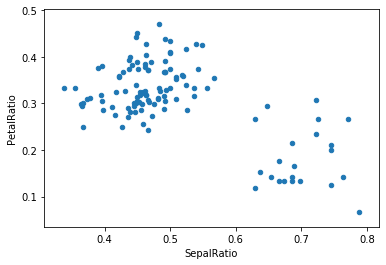

In [215]:
(iris.query('SepalLength > 5')
             .assign(SepalRatio=lambda x: x.SepalWidth/ x.SepalLength,
                     PetalRatio=lambda x: x.PetalWidth / x.PetalLength)
             .plot(kind='scatter', x='SepalRatio', y='PetalRatio'))

Since a function is passed in, the function is computed on the DataFrame being assigned to. Importantly, this is the DataFrame that’s been filtered to those rows with sepal length greater than 5. The filtering happens first, and then the ratio calculations. This is an example where we didn’t have a reference to the filtered DataFrame available.

The function signature for assign is simply **kwargs**. The keys are the column names for the new fields, and the values are either a value to be inserted (for example, a Series or NumPy array), or a function of one argument to be called on the DataFrame. A copy of the original DataFrame is returned, with the new values inserted.

*Changed in version 0.23.0.*

Starting with Python 3.6 the order of **kwargs** is preserved. This allows for dependent assignment, where an expression later in **kwargs** can refer to a column created earlier in the same assign().

In [212]:
dfa= pd.DataFrame( {'A': [1,2,3],
                    'B': [4,5,6]})
dfa

,A,B
0,1,4
1,2,5
2,3,6


In [213]:
dfa.assign( C=lambda x: x['A'] + x['B'],
            D=lambda x: x['A'] + x['C'])  # only works in Python 3.6 onwards

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In the second expression, x['C'] will refer to the newly created column, that’s equal to dfa['A'] + dfa['B'].

**N/B:** To write code compatible with all versions of Python, split the assignment in two.

In [216]:
#Exp1.
dfa=dfa.assign( C=lambda x: x['A'] + x['B'])
dfa=dfa.assign( D=lambda x: x['A'] + x['C'])
dfa

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [250]:
#Exp2.
dependent = pd.DataFrame( {'A': [1, 1, 1]}); dependent

,A
0,1
1,1
2,1


In [248]:
(dependent.assign(A=lambda x: x['A'] + 1)
          .assign(B=lambda x:x['A'] + 2))

,A,B
0,2,4
1,2,4
2,2,4


In [252]:
dependent.assign(A=lambda x: x['A'] +1,  B=lambda x: x['A']+2 )

,A,B
0,2,4
1,2,4
2,2,4


__WARNING:__ Dependent assignment maybe subtly change the behavior of your code between Python 3.6 and older versions of Python.
If you wish write code that supports versions of python before and after 3.6, you’ll need to take care when passing assign expressions that

* Updating an existing column
* Referring to the newly updated column in the same assign
For example, we’ll update column “A” and then refer to it when creating “B”.

```
>>> dependent = pd.DataFrame({"A": [1, 1, 1]})
>>> dependent.assign(A=lambda x: x["A"] + 1, B=lambda x: x["A"] + 2)
```


# Indexing / Selection

The basics of indexing are as follows:

**Operation** | **Syntax** | **Result** 
--------------| ---------- | -----------
Select column | df[col] | Series
Select row by lable | df.loc[label] | Series
Select row by inteher location| df.iloc[loc] |  Series
Select rows | df[5:10] | DataFrame
Select rows by boolen vector | df[bool_vec] | DataFrame

Row selection, for example, returns a Series whose **index is the columns** of the DataFrame:

In [217]:
df.head()

,one,flag,foo,five
a,1.0,False,bar,NaN
b,2.0,False,bar,NaN
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [221]:
df.loc['b']

one         2
flag    False
foo       bar
five      NaN
Name: b, dtype: object

In [220]:
df.loc[ ['b', 'c']]

,one,flag,foo,five
b,2.0,False,bar,NaN
c,3.0,True,bar,NaN


In [256]:
df.iloc[2]

one             3
two             6
bar             3
flag         True
foo           bar
five          NaN
one_trunc     NaN
Name: c, dtype: object

# Data alignment and arithmetic

Data alignment between DataFrame objects automatically align on both the __columns and the index (row labels)__. Again, the resulting object will have the union of the column and row labels.

In [224]:
np.random.seed(44)
df = pd.DataFrame(np.random.randn(10,4), columns=['A', 'B', 'C', 'D'])

In [225]:
df

,A,B,C,D
0,-0.750615,1.316357,1.246140,-1.604916
1,-1.468144,-1.715070,1.858784,0.087588
2,-0.052322,0.555472,-0.963404,-0.180321
3,-1.183409,0.605446,-0.951651,0.360856
4,1.060610,-0.117152,0.825665,-1.209814
5,-1.190504,0.219872,-0.212919,-1.411499
6,-0.482981,1.201762,-0.705803,0.025181
7,-0.391128,0.193139,0.349291,0.591188
8,0.520410,0.825222,0.426204,0.195640
9,-0.514112,-3.073689,-0.395159,-0.795399


In [227]:
np.random.seed(44)
df2 = pd.DataFrame(np.random.randn(7,3), columns=['A', 'B', 'C']); df2

,A,B,C
0,-0.750615,1.316357,1.246140
1,-1.604916,-1.468144,-1.715070
2,1.858784,0.087588,-0.052322
3,0.555472,-0.963404,-0.180321
4,-1.183409,0.605446,-0.951651
5,0.360856,1.060610,-0.117152
6,0.825665,-1.209814,-1.190504


In [260]:
df + df2

,A,B,C,D
0,-1.937897,0.501214,0.724914,NaN
1,-0.925749,-3.425239,0.223469,NaN
2,2.050708,0.466879,1.509534,NaN
3,-1.781991,0.599192,0.327534,NaN
4,1.263184,-0.587593,-2.279516,NaN
5,-1.953294,0.253479,0.279023,NaN
6,-1.985398,0.751013,-1.211839,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


__Note__: When doing an operation between DataFrame and Series, the default behavior is to align the Series index on the DataFrame columns, thus [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) row-wise. For example:

In [228]:
df -df.iloc[0]

,A,B,C,D
0,0.000000,0.000000,0.000000,0.000000
1,-0.717529,-3.031428,0.612644,1.692504
2,0.698293,-0.760886,-2.209544,1.424594
3,-0.432794,-0.710911,-2.197791,1.965772
4,1.811225,-1.433510,-0.420475,0.395102
5,-0.439889,-1.096486,-1.459059,0.193417
6,0.267634,-0.114595,-1.951943,1.630097
7,0.359487,-1.123218,-0.896849,2.196104
8,1.271025,-0.491135,-0.819937,1.800556
9,0.236503,-4.390046,-1.641299,0.809517


In the special case of working with time series data, and the DataFrame index also contains dates, the broadcasting will be **column-wise**:

In [230]:
np.random.seed(44)
index= pd.date_range('1/1/2000', periods=8)
index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D')

In [231]:
df= pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))

In [232]:
df

,A,B,C
2000-01-01,-0.750615,1.316357,1.246140
2000-01-02,-1.604916,-1.468144,-1.715070
2000-01-03,1.858784,0.087588,-0.052322
2000-01-04,0.555472,-0.963404,-0.180321
2000-01-05,-1.183409,0.605446,-0.951651
2000-01-06,0.360856,1.060610,-0.117152
2000-01-07,0.825665,-1.209814,-1.190504
2000-01-08,0.219872,-0.212919,-1.411499


In [233]:
type(df['A'])

pandas.core.series.Series

In [234]:
df-df['A']

,2000-01-01 00:00:00,2000-01-02 00:00:00,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00,2000-01-08 00:00:00,A,B,C
2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__Warning__

``` df - df['A'] ```

is now deprecated and will be removed in a future release. The preferred way to replicate this behavior is

```df.sub(df['A'], axis=0)```

For explicit control over the matching and broadcasting behavior, see the section on [flexible binary operations](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-binop).

Operations with scalars are just as you would expect:


In [235]:
df.sub(df['A'], axis=0) # replaces df - df['A']

,A,B,C
2000-01-01,0.0,2.066972,1.996755
2000-01-02,0.0,0.136772,-0.110155
2000-01-03,0.0,-1.771196,-1.911106
2000-01-04,0.0,-1.518875,-0.735793
2000-01-05,0.0,1.788855,0.231759
2000-01-06,0.0,0.699754,-0.478008
2000-01-07,0.0,-2.035478,-2.016168
2000-01-08,0.0,-0.432791,-1.631371


In [237]:
df.add(df['A'], axis=0) #For addition

,A,B,C
2000-01-01,-1.501229,0.565743,0.495525
2000-01-02,-3.209831,-3.073059,-3.319986
2000-01-03,3.717567,1.946372,1.806461
2000-01-04,1.110943,-0.407932,0.375150
2000-01-05,-2.366818,-0.577963,-2.135060
2000-01-06,0.721712,1.421466,0.243704
2000-01-07,1.651330,-0.384149,-0.364839
2000-01-08,0.439744,0.006953,-1.191627


In [238]:
df * 5 + 2

,A,B,C
2000-01-01,-1.753074,8.581787,8.230700
2000-01-02,-6.024579,-5.340718,-6.575352
2000-01-03,11.293918,2.437940,1.738389
2000-01-04,4.777358,-2.817018,1.098393
2000-01-05,-3.917046,5.027230,-2.758253
2000-01-06,3.804280,7.303051,1.414239
2000-01-07,6.128324,-4.049068,-3.952518
2000-01-08,3.099359,0.935404,-5.057496


In [239]:
1/df

,A,B,C
2000-01-01,-1.332241,0.759672,0.802478
2000-01-02,-0.623086,-0.681132,-0.583066
2000-01-03,0.537986,11.417092,-19.112347
2000-01-04,1.800272,-1.037986,-5.545651
2000-01-05,-0.845016,1.651675,-1.050806
2000-01-06,2.771188,0.942853,-8.535906
2000-01-07,1.211145,-0.826574,-0.839981
2000-01-08,4.548104,-4.696619,-0.708467


In [240]:
df **4

,A,B,C
2000-01-01,0.317445,3.002584,2.411390
2000-01-02,6.634511,4.645947,8.652226
2000-01-03,11.937556,0.000059,0.000007
2000-01-04,0.095202,0.861456,0.001057
2000-01-05,1.961280,0.134370,0.820182
2000-01-06,0.016956,1.265387,0.000188
2000-01-07,0.464745,2.142268,2.008736
2000-01-08,0.002337,0.002055,3.969378


Boolean operators work as well:

In [241]:
df1= pd.DataFrame( {'a': [1,0,1], 'b': [0,1,1]}, dtype=bool)
df2= pd.DataFrame( {'a': [0,1,1], 'b': [1,1,0]}, dtype=bool)

In [242]:
df1 & df2

,a,b
0,False,False
1,False,True
2,True,False


In [243]:
df1 | df2

,a,b
0,True,True
1,True,True
2,True,True


In [244]:
df1 

,a,b
0,True,False
1,False,True
2,True,True


In [245]:
df1 ^ df2

,a,b
0,True,True
1,True,False
2,False,True


In [246]:
df2

,a,b
0,False,True
1,True,True
2,True,False


In [247]:
-df1

,a,b
0,False,True
1,True,False
2,False,False


# Transposing

To transpose, access the T attribute (also the *transpose* function), similar to an ndarray:

In [249]:
#Only show the firts 5 rows
df[:5].T

,2000-01-01,2000-01-02,2000-01-03,2000-01-04,2000-01-05
A,-0.750615,-1.604916,1.858784,0.555472,-1.183409
B,1.316357,-1.468144,0.087588,-0.963404,0.605446
C,1.246140,-1.715070,-0.052322,-0.180321,-0.951651


Similarly, the dot method on Series implements dot product:

In [250]:
s1= pd.Series(np.arange(5,10)) 

In [251]:
s1

0    5
1    6
2    7
3    8
4    9
dtype: int64

In [252]:
s1.dot(s1)

255

# DataFrame interoperability with NumPy functions

Elementwise NumPy ufuncs (log, exp, sqrt, …) and various other NumPy functions can be used with no issues on DataFrame, assuming the data within are numeric:

In [263]:
np.random.seed(44)
print(df.shape)
np.exp(df)

(8, 3)


,A,B,C
2000-01-01,0.472076,3.729810,3.476896
2000-01-02,0.200906,0.230353,0.179951
2000-01-03,6.415928,1.091538,0.949023
2000-01-04,1.742763,0.381592,0.835002
2000-01-05,0.306233,1.832069,0.386103
2000-01-06,1.434557,2.888133,0.889450
2000-01-07,2.283398,0.298253,0.304068
2000-01-08,1.245917,0.808221,0.243778


In [264]:
print(np.asarray(df))
print(np.asarray(df).shape)

[[-0.75061472  1.31635732  1.24614003]
 [-1.60491574 -1.46814368 -1.71507046]
 [ 1.85878369  0.08758798 -0.0523222 ]
 [ 0.55547164 -0.96340369 -0.18032147]
 [-1.18340916  0.60544592 -0.95165055]
 [ 0.36085606  1.06061026 -0.11715218]
 [ 0.82566485 -1.20981355 -1.19050362]
 [ 0.21987182 -0.21291913 -1.41149914]]
(8, 3)


DataFrame is not intended to be a drop-in replacement for ndarray as its indexing semantics and data model are quite different in places from an n-dimensional array.

Series implements  \__array__ufunc__,  which allows it to work with NumPy’s universal functions.

The ufunc is applied to the underlying array in a Series.

The dot method on DataFrame implements matrix multiplication:

In [265]:
ser = pd.Series([1, 2, 3, 4])
np.exp(ser)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

Changed in version 0.25.0: When multiple Series are passed to a ufunc, they are aligned before performing the operation.

Like other parts of the library, pandas will automatically align labeled inputs as part of a ufunc with multiple inputs. For example, using **numpy.remainder()** on two Series with differently ordered labels will align before the operation.

In [285]:
ser1= pd.Series([1,2,3], index=list('abc'))
ser2= pd.Series([1, 3, 5], index= list('bac'))

In [286]:
ser1

a    1
b    2
c    3
dtype: int64

In [287]:
ser2

b    1
a    3
c    5
dtype: int64

In [288]:
np.remainder(ser1, ser2)

a    1
b    0
c    3
dtype: int64

As usual, the union of the two indices is taken, and non-overlapping values are filled with missing values.

In [289]:
ser3= pd.Series([2, 4, 6], index=['b', 'c', 'd'])
ser3

b    2
c    4
d    6
dtype: int64

In [290]:
np.remainder(ser1, ser3)

a    NaN
b    0.0
c    3.0
d    NaN
dtype: float64

When a binary ufunc is applied to a **Series** and **Index**, the Series implementation takes precedence and a Series is returned.


In [291]:
ser= pd.Series([1,2,3])
ser

0    1
1    2
2    3
dtype: int64

In [292]:
idx= pd.Index([4,5,6])
idx

Int64Index([4, 5, 6], dtype='int64')

NumPy ufuncs are safe to apply to Series backed by non-ndarray arrays, for example **SparseArray (see Sparse calculation)**. If possible, the ufunc is applied without converting the underlying data to an ndarray.


# Console display

Very large DataFrames will be truncated to display them in the console. You can also get a summary using [info()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info). (Here I am reading a CSV version of the __baseball__ dataset from the __plyr__ R package):

## Reading in Data

In [274]:
import csv

In [275]:
# import nyc_taxi.csv as a list of lists
f = open('zw_index_translated_fv.csv', 'r')
taxi_list = list(csv.reader(f))

# remove the header row
taxi_list = taxi_list[1:]

# convert all values to floats
#converted_taxi_list = []
#for row in taxi_list:
#    converted_row = []
#    for item in row:
#        converted_row.append(float(item))
#    converted_taxi_list.append(converted_row)
taxi= np.array(taxi_list)

In [276]:
len(taxi_list)
taxi_list[0:4]
taxi.shape

(49, 6)

In [277]:
taxi_list[0:2]
taxi_list[1][3]
taxi_list[1][0:3]

['1', 'z23', 'Gesamtzuchtwert']

In [278]:
taxi[0:2]
taxi[1,3]
cols= [1, 4,5]
columns_1_4_5= taxi[:, cols] 
#columns_1_4_5


array([['z3', 'Trait', 'Trait Category'],
       ['z23', 'total merit index', ''],
       ['z30', 'milk index', 'Milk production'],
       ['z56', 'beef index', 'Growth & carcass quality'],
       ['z178', 'Fitness', ''],
       ['z25', 'Milk Kg', 'Milk production'],
       ['z27', 'Fat %', 'Milk production'],
       ['z26', 'Fat kg', 'Milk production'],
       ['z29', 'Protein %', 'Milk production'],
       ['z28', 'Protein Kg', 'Milk production'],
       ['z58', 'Daily net gain', 'Growth & carcass quality'],
       ['z59', 'Carcass perc', 'Growth & carcass quality'],
       ['z60', 'EUROPA trade class', ''],
       ['z74', 'Longevity', ''],
       ['z50', 'Persistency', ''],
       ['z61', 'Fertility Maternal', 'Fertility'],
       ['z67', 'Calving ease pat.', 'Fertility'],
       ['z65', 'Calving ease mat.', 'Fertility'],
       ['z590', 'Vitality', ''],
       ['z566', 'Udder health', 'Mammary gland morphology'],
       ['z52', 'Somatic cell count', ''],
       ['z54', 'Milking spe

In [279]:
my_nums= [[1,2,3,4,5], [2,4,6,8,10], list(range(10, 35, 5))]
my_nums
sums=[]
for row in my_nums:
    print(row)
    row_sum= row[0] + row[1]
    sums.append(row_sum)
print(sums)

[1, 2, 3, 4, 5]
[2, 4, 6, 8, 10]
[10, 15, 20, 25, 30]
[3, 6, 25]


In [280]:
n1= [list(range(1,11, 2)), list(range(5,10))]
type(n1)

list

In [281]:
print(my_nums)

[[1, 2, 3, 4, 5], [2, 4, 6, 8, 10], [10, 15, 20, 25, 30]]


In [282]:
pd.DataFrame(n1,columns=['A', 'B', 'C', 'D', 'E'])

,A,B,C,D,E
0,1,3,5,7,9
1,5,6,7,8,9


In [283]:
n1
n2= np.array(n1)
n2

array([[1, 3, 5, 7, 9],
       [5, 6, 7, 8, 9]])

In [284]:
n2[1,2]

7